In [1]:
from pycbc import distributions
from pycbc.waveform import get_td_waveform
import matplotlib.pyplot as plt
import numpy as np
import pylab
from tqdm.notebook import tqdm
from gwpy.timeseries import TimeSeries
import pandas as pd
import os
import csv
import pycbc.noise
import pycbc.psd

In [2]:

print("Generated Binary Mass Distributions for BBH")

bbh_two_mass_distributions = distributions.Uniform(mass1=(10, 50),
                                               mass2=(10, 50))

bbh_two_mass_samples = bbh_two_mass_distributions.rvs(size=5000)

Generated Binary Mass Distributions for BBH


In [5]:
print("Using Binary Mass Distributions to generate BBH waveforms")
print("Generating BBH Waveforms, Noise and Merging them together and writing into disk, it may take few minutes...")

for i in tqdm(range(len(bbh_two_mass_samples))):

    hp, hc = get_td_waveform(approximant="SEOBNRv2",                                # what are hp and hc?
                         mass1=bbh_two_mass_samples[i][0],
                         mass2=bbh_two_mass_samples[i][1],
                         delta_t=1.0/4096,
                         f_lower=40)                                                # change to 40 Hz

    signal = TimeSeries.from_pycbc(hp)
    signal.write("data/signal/bbh_merged_signal_"+str(i)+".txt")

    # st = np.random.randint(0,2)
    st = 1
    signal.t0 = st
    signal = (signal/(max(signal.max(), np.abs(signal.min()))))*0.2
    
    # The color of the noise matches a PSD which you provide
    flow = 30.0
    delta_f = 1.0 / 16
    flen = int(2048 / delta_f) + 1
    psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)

    # Generate 4 seconds of noise at 4096 Hz
    delta_t = 1.0 / 4096
    tsamples = int(4 / delta_t)
    noise = pycbc.noise.noise_from_psd(tsamples, delta_t, psd)

    noise *= 1e21
    noise *= 0.4
    noise = TimeSeries.from_pycbc(noise)

    data = noise.inject(signal)

    data *= 1e-17
    
    data.write("data/merged/bbh_merged_noise_signal_"+str(i)+".txt")

Using Binary Mass Distributions to generate BBH waveforms
Generating BBH Waveforms, Noise and Merging them together and writing into disk, it may take few minutes...


  0%|          | 0/3446 [00:00<?, ?it/s]

In [3]:
# MERGING NOISE + SIgnal Templates into single file

path = "data/merged/"
files= os.listdir(path)
f = open('data/Final_BBH_Merged_Noise_Signal.csv', 'w')
cw = csv.writer(f)

for i in tqdm(files):
    df = pd.read_csv(path+i,sep = ' ', header=None)
    c = df[:][1]
    cw.writerow(c)
f.close()

  0%|          | 0/5000 [00:00<?, ?it/s]

In [ ]:
for i in tqdm(range(5000)):
    # The color of the noise matches a PSD which you provide
    flow = 30.0
    delta_f = 1.0 / 16
    flen = int(2048 / delta_f) + 1
    psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)

    # Generate 4 seconds of noise at 4096 Hz
    delta_t = 1.0 / 4096
    tsamples = int(4 / delta_t)
    noise = pycbc.noise.noise_from_psd(tsamples, delta_t, psd)

    noise *= 1e21
    noise *= 0.4
    noise = TimeSeries.from_pycbc(noise)
    noise *= 1e-17
    
    noise.write("data/noise/noise_"+str(i)+".txt")    

In [5]:
# MERGING NOISE Templates into single file

path_1 = "data/noise/"
files_1= os.listdir(path_1)
f1 = open('data/Final_Merged_Noise_Reduced_No_Abs.csv', 'w')
cw_1 = csv.writer(f1)

for i in tqdm(files_1):
    #print(files)
    df = pd.read_csv(path_1+i,sep = ' ', header=None)
    c = df[:][1]
    cw_1.writerow(c)
f1.close()

  0%|          | 0/5000 [00:00<?, ?it/s]

In [2]:
# # Alternate
# for i in tqdm(range(5000)):

#     signal = TimeSeries.read("data/signal/bbh_merged_signal_"+str(i)+".txt")
#     signal = (signal/(max(signal.max(), np.abs(signal.min()))))*0.2

#     st = 1
#     signal.t0 = st
    
#     # The color of the noise matches a PSD which you provide
#     flow = 30.0
#     delta_f = 1.0 / 16
#     flen = int(2048 / delta_f) + 1
#     psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)

#     # Generate 4 seconds of noise at 4096 Hz
#     delta_t = 1.0 / 4096
#     tsamples = int(4 / delta_t)
#     noise = pycbc.noise.noise_from_psd(tsamples, delta_t, psd)

#     noise *= 1e21
#     noise *= 0.4
#     noise = TimeSeries.from_pycbc(noise)

#     data = noise.inject(signal)

#     data *= 1e-17

#     data.write("data/merged/bbh_merged_noise_signal_"+str(i)+".txt")

  0%|          | 0/5000 [00:00<?, ?it/s]

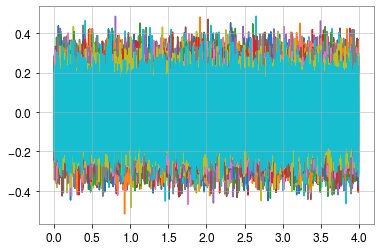

In [6]:
for i in range(50):
    # The color of the noise matches a PSD which you provide
    flow = 30.0
    delta_f = 1.0 / 16
    flen = int(2048 / delta_f) + 1
    psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)

    # Generate 4 seconds of noise at 4096 Hz
    delta_t = 1.0 / 4096
    tsamples = int(4 / delta_t)
    ts = pycbc.noise.noise_from_psd(tsamples, delta_t, psd) # seed=127

    ts *= 1e21
    ts *= 0.4

    ts.plot()